In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO

import os

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 11
mpl.rcParams['legend.fontsize'] = 11
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11


Extract effectors belonging to a certain protein family.

In [2]:
txse_data = pd.read_table('data/TXSE-list.tsv')
family = 'nle'
txse_with_gene = txse_data.dropna(subset=['gene'])

txse_family = txse_with_gene[txse_with_gene['gene'].map(lambda x: x.startswith(family))]
txse_family


,name,system,score,length,NonEffector.prob,T1SE.prob,T2SE.prob,T3SE.prob,T4SE.prob,T6SE.prob,assembly,replicon,protein_id,location,annotation,locus_tag,gene
70230,BA000007.3_prot_0809,III,0.9260,326,0.0026,0.0004,0.0006,0.9260,0.0687,0.0017,GCA_000008865,BA000007.3,BAB34269.1,924622..925602,T3SS secreted effector NleB,ECs_0846,nleB2-1
70231,BA000007.3_prot_0810,III,0.9999,339,0.0000,0.0000,0.0000,0.9999,0.0000,0.0000,GCA_000008865,BA000007.3,BAB34270.2,925636..926655,T3SS secreted effector NleC,ECs_0847,nleC
70232,BA000007.3_prot_0811,III,0.9999,293,0.0000,0.0000,0.0001,0.9999,0.0000,0.0000,GCA_000008865,BA000007.3,BAB34271.1,927483..928364,T3SS secreted effector NleH,ECs_0848,nleH1-1
70233,BA000007.3_prot_0813,III,0.9936,232,0.0001,0.0027,0.0008,0.9936,0.0008,0.0020,GCA_000008865,BA000007.3,BAB34273.1,928595..929293,T3SS secreted effector NleD,ECs_0850,nleD
70353,BA000007.3_prot_1721,III,0.9993,441,0.0000,0.0002,0.0001,0.9993,0.0004,0.0000,GCA_000008865,BA000007.3,BAB35235.1,complement(1801678..1803003),T3SS secreted effector NleA/EspI,ECs_1812,nleA/espI
70354,BA000007.3_prot_1723,III,0.9998,303,0.0000,0.0001,0.0001,0.9998,0.0000,0.0000,GCA_000008865,BA000007.3,BAB35237.1,1804830..1805741,T3SS secreted effector NleH,ECs_1814,nleH1_2
70355,BA000007.3_prot_1724,III,0.7908,189,0.0004,0.0002,0.0002,0.7908,0.2081,0.0004,GCA_000008865,BA000007.3,BAB35238.1,1805807..1806376,T3SS secreted effector NleF,ECs_1815,nleF
70356,BA000007.3_prot_1732,III,0.9991,215,0.0000,0.0000,0.0000,0.9991,0.0008,0.0000,GCA_000008865,BA000007.3,BAB35247.1,complement(1810983..1811630),T3SS secreted effector NleG,ECs_1824,nleG
70375,BA000007.3_prot_1899,III,0.9929,191,0.0002,0.0001,0.0001,0.9929,0.0064,0.0002,GCA_000008865,BA000007.3,BAB35417.1,1970264..1970839,T3SS secreted effector NleG,ECs_1994,nleG2-2
70376,BA000007.3_prot_1900,III,0.9998,209,0.0000,0.0000,0.0000,0.9998,0.0001,0.0000,GCA_000008865,BA000007.3,BAB35418.1,1970912..1971541,T3SS secreted effector NleG,ECs_1995,nleG6-1


Plot the embedding of nle T3SEs, and annotate some of the effectors.

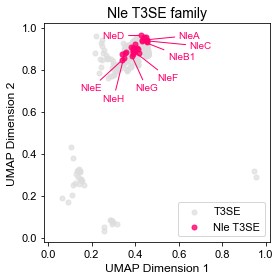

In [3]:
import matplotlib.pyplot as plt
import json


fig, ax = plt.subplots(figsize=(4, 4))

with open('data/umap_coord.json') as f:
    umap_data = json.load(f)

coord = np.array([[data['x'], data['y']] for data in umap_data])
t3se_coord = np.array([[data['x'], data['y']] for data in umap_data if data['label'] == 'T3SE'])
nle_coord = np.load('data/nle_effector.umap.npy')

# x_min, x_max = t3se_coord.min(0), t3se_coord.max(0)
x_min, x_max = coord.min(0), coord.max(0)
t3se_norm = (t3se_coord - x_min) / (x_max - x_min)
nle_norm = (nle_coord - x_min) / (x_max - x_min)

ax.scatter(t3se_norm[:, 0], t3se_norm[:, 1],
            c='#dddddd', alpha=0.7, s=25, label='T3SE')

ax.scatter(nle_norm[:, 0], nle_norm[:, 1],
            c='#ff006e', alpha=0.8, s=25, label='Nle T3SE')

ax.annotate(text='NleA', xy=(nle_norm[4, 0], nle_norm[4, 1]), xytext=(0.6, 0.95), c='#ff006e',
            arrowprops={'arrowstyle': '-', 'color': '#ff006e'})
ax.annotate(text='NleB1', xy=(nle_norm[17, 0], nle_norm[17, 1]), xytext=(0.55, 0.85),c='#ff006e',
             arrowprops={'arrowstyle': '-', 'color': '#ff006e'})
ax.annotate(text='NleC', xy=(nle_norm[1, 0], nle_norm[1, 1]), xytext=(0.65, 0.9),c='#ff006e',
            arrowprops={'arrowstyle': '-', 'color': '#ff006e'})
ax.annotate(text='NleD', xy=(nle_norm[3, 0], nle_norm[3, 1]), xytext=(0.25, 0.95),c='#ff006e',
             arrowprops={'arrowstyle': '-', 'color': '#ff006e'})
ax.annotate(text='NleE', xy=(nle_norm[18, 0], nle_norm[18, 1]), xytext=(0.15, 0.7),c='#ff006e',
            arrowprops={'arrowstyle': '-', 'color': '#ff006e'})
ax.annotate(text='NleF', xy=(nle_norm[6, 0], nle_norm[6, 1]), xytext=(0.5, 0.75),c='#ff006e',
             arrowprops={'arrowstyle': '-', 'color': '#ff006e'})
ax.annotate(text='NleG', xy=(nle_norm[7, 0], nle_norm[7, 1]), xytext=(0.4, 0.7),c='#ff006e',
             arrowprops={'arrowstyle': '-', 'color': '#ff006e'})
ax.annotate(text='NleH', xy=(nle_norm[-3, 0], nle_norm[-3, 1]), xytext=(0.25, 0.65), c='#ff006e',
            arrowprops={'arrowstyle': '-', 'color': '#ff006e'})


ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")

ax.set_title('Nle T3SE family')
ax.legend(loc="lower right")
ax.set_xlim([-0.02,1.02])
ax.set_ylim([-0.02,1.02])

plt.tight_layout()

plt.savefig('pdf/Nle_T3SE_umap.pdf')


Plot the embedding of rhs T6SEs, and annotate some of the effectors.

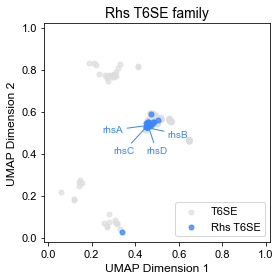

In [4]:
import matplotlib.pyplot as plt
import json

fig, ax = plt.subplots(figsize=(4, 4))

with open('data/umap_coord.json') as f:
    umap_data = json.load(f)

coord = np.array([[data['x'], data['y']] for data in umap_data])
t6se_coord = np.array([[data['x'], data['y']]
                      for data in umap_data if data['label'] == 'T6SE'])
rhs_coord = np.load('data/rhs_effector.umap.npy')

# x_min, x_max = t3se_coord.min(0), t3se_coord.max(0)
x_min, x_max = coord.min(0), coord.max(0)
t6se_norm = (t6se_coord - x_min) / (x_max - x_min)
rhs_norm = (rhs_coord - x_min) / (x_max - x_min)

ax.scatter(t6se_norm[:, 0], t6se_norm[:, 1],
           c='#dddddd', alpha=0.7, s=25, label='T6SE')

ax.scatter(rhs_norm[:-1, 0], rhs_norm[:-1, 1],
           c='#3a86ff', alpha=0.8, s=25, label='Rhs T6SE')

ax.annotate(text='rhsA', xy=(rhs_norm[2, 0], rhs_norm[2, 1]), xytext=(0.25, 0.5), c='#3a86ff',
            arrowprops={'arrowstyle': '-', 'color': '#3a86ff'})
ax.annotate(text='rhsB', xy=(rhs_norm[1, 0], rhs_norm[1, 1]), xytext=(0.55, 0.48), c='#3a86ff',
            arrowprops={'arrowstyle': '-', 'color': '#3a86ff'})
ax.annotate(text='rhsC', xy=(rhs_norm[0, 0], rhs_norm[0, 1]), xytext=(0.3, 0.4), c='#3a86ff',
            arrowprops={'arrowstyle': '-', 'color': '#3a86ff'})
ax.annotate(text='rhsD', xy=(rhs_norm[4, 0], rhs_norm[4, 1]), xytext=(0.45, 0.4), c='#3a86ff',
            arrowprops={'arrowstyle': '-', 'color': '#3a86ff'})

ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_xlim([-0.02,1.02])
ax.set_ylim([-0.02,1.02])

ax.set_title('Rhs T6SE family')
ax.legend(loc="lower right")

plt.tight_layout()

plt.savefig('pdf/Rhs_T6SE_umap.pdf')
